<a href="https://colab.research.google.com/github/aravind309/Tensorflow-AI/blob/master/ANN_FMNIST_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation

In [2]:
fmnist = tf.keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

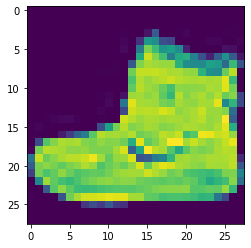

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and that we are ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

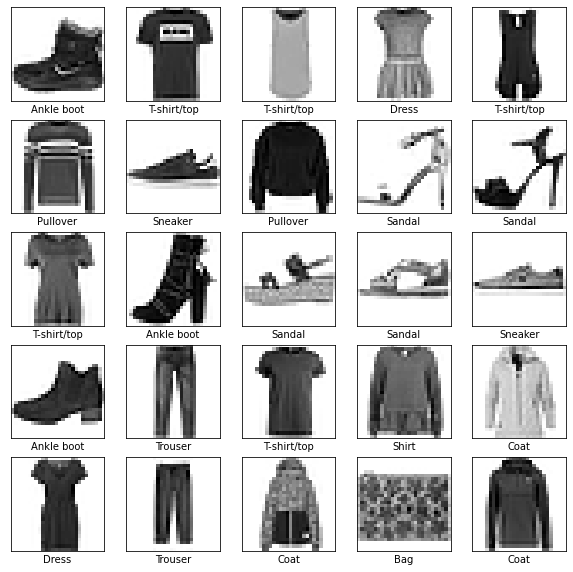

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

Basic building block of a neural network is layer. Layers extract representations from the data fed into them.The first layer in this network, tf.keras.layers.Flatten, which transforms format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). This is like unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons).The Second Dense layer has 64 nodes (or neurons) The third (and last) layer returns a logits array with length of 10.Softmax activation is used to convert the logits to probabilities, which are easier to interpret.

In [7]:
#A Sequential model can be done in any of the below ways
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
#                                     tf.keras.layers.Dense(128, activation=tf.nn.relu), 
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [8]:
#Compile the model(Adding few settings to model)
model.compile(optimizer="adam",loss ="sparse_categorical_crossentropy", metrics=['accuracy'])

Model will be fit to train data

In [9]:
#Train the model
model.fit(training_images, training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6183 - accuracy: 0.7819
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3737 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3316 - accuracy: 0.8788
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2883 - accuracy: 0.8921


Model will be analysed on test data

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.8772


[0.35103997588157654, 0.8772000074386597]

In [11]:
predictions = model.predict(test_images)
print(np.argmax(predictions[0]),test_labels[0])
print(model.summary())

9 9
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

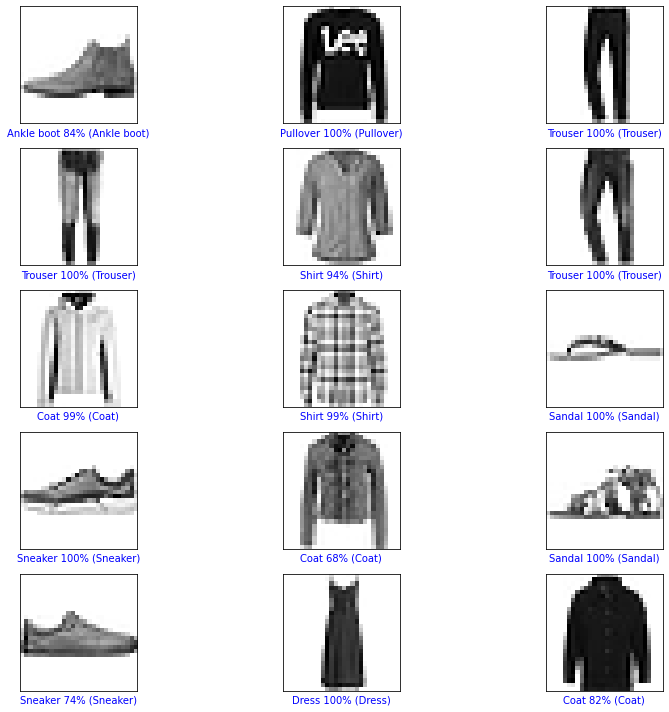

In [13]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import classification_report
report = classification_report(test_labels,predictions.argmax(axis=1),target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.77      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.80      0.79      1000
       Dress       0.86      0.89      0.88      1000
        Coat       0.82      0.75      0.78      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.65      0.74      0.70      1000
     Sneaker       0.91      0.98      0.94      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

